In [47]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [50]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc

In [4]:
style.use('ggplot')

In [6]:
# start = dt.datetime(2000,1,1)
# end = dt.datetime(2016,12,31)

In [10]:
# df = yf.download('TSLA',start, end)
# df.head(6)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500


In [13]:
# df.to_csv('tsla.csv')

In [17]:
df = pd.read_csv('tsla.csv',parse_dates=True, index_col = 0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


## Visualization

<AxesSubplot:xlabel='Date'>

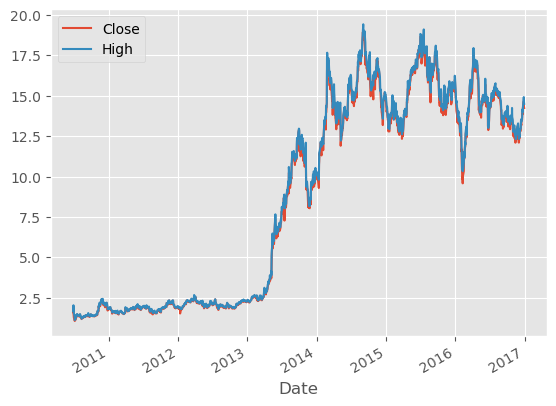

In [24]:
# df[['Close','High']].plot()

## Manipulating data

In [32]:
# df['100ma'] = df['Adj Close'].rolling(window=100, min_periods = 0).mean()
# print(df['100ma'].tail())

Date
2016-12-23    13.507933
2016-12-27    13.500547
2016-12-28    13.493687
2016-12-29    13.486033
2016-12-30    13.475773
Name: 100ma, dtype: float64


How to manage null data here? By using inplace -> removing the ones that where missing a number
min_periods= 0, changing the values by 0

In [31]:
# df.dropna(inplace=True)
# df.tail()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2016-12-23,13.866667,14.230000,13.847333,14.222667,14.222667,70057500,13.507933
2016-12-27,14.325333,14.816667,14.294667,14.635333,14.635333,88735500,13.500547
2016-12-28,14.768667,14.920000,14.480000,14.649333,14.649333,56737500,13.493687
2016-12-29,14.570667,14.613333,14.274667,14.312000,14.312000,60675000,13.486033
2016-12-30,14.420000,14.500000,14.112000,14.246000,14.246000,69639000,13.475773


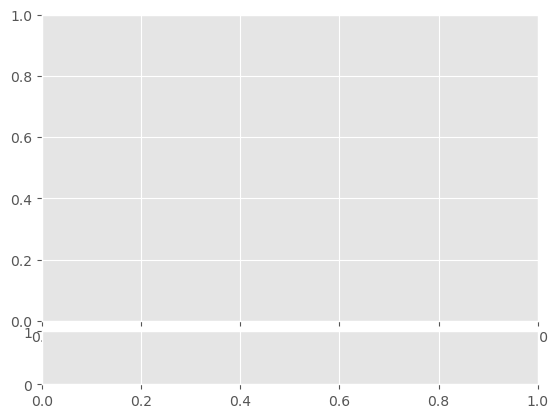

In [61]:
ax1 = plt.subplot2grid((6,1),(0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1)

# ax1.plot(df.index, df['Adj Close'])
# ax1.plot(df.index, df['100ma'])
# ax2.plot(df.index, df['Volume'])


## Resampling data
Idea: take some information and resample it, make a new dataframe. Count how many people walk through the doorway? You need like an hourly number not to know everytime they will, in this case we could resample and sum every hour

In [45]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
# or use : mean or min or max...
df_ohlc.head()

,open,high,low,close
Date,,,,
2010-11-17,1.966000,2.364667,1.966000,2.354667
2010-11-27,2.288667,2.355333,2.020667,2.020667
2010-12-07,2.104000,2.158000,1.902000,2.054000
2010-12-17,2.090667,2.175333,2.006000,2.006000
2010-12-27,1.703333,1.848667,1.703333,1.788667


In [44]:
df_volume = df['Volume'].resample('10D').sum()


We have to reset the index so the date is now column

In [52]:
df_ohlc.reset_index(inplace=True)
df_ohlc.head()

,index,Date,open,high,low,close
0,0,2010-11-17,1.966000,2.364667,1.966000,2.354667
1,1,2010-11-27,2.288667,2.355333,2.020667,2.020667
2,2,2010-12-07,2.104000,2.158000,1.902000,2.054000
3,3,2010-12-17,2.090667,2.175333,2.006000,2.006000
4,4,2010-12-27,1.703333,1.848667,1.703333,1.788667


In [54]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
df_ohlc.head()

,index,Date,open,high,low,close
0,0,1.728009e-07,1.966000,2.364667,1.966000,2.354667
1,1,1.729167e-07,2.288667,2.355333,2.020667,2.020667
2,2,1.730324e-07,2.104000,2.158000,1.902000,2.054000
3,3,1.731481e-07,2.090667,2.175333,2.006000,2.006000
4,4,1.732639e-07,1.703333,1.848667,1.703333,1.788667


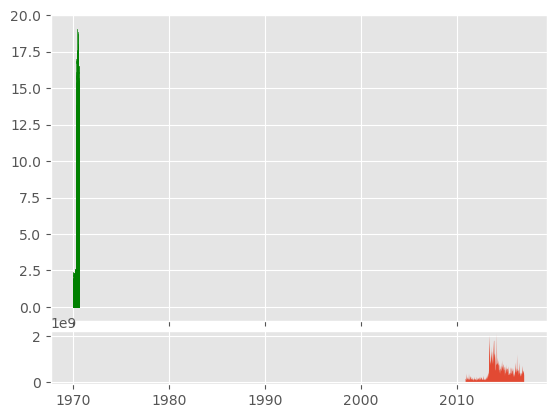

In [65]:
ax1 = plt.subplot2grid((6,1),(0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.xaxis_date()  # Format x-axis to display dates
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g', colordown='r')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)

plt.show()

In [66]:
import yfinance as yf
df = yf.download('TSLA', start=start, end=end)


[*********************100%%**********************]  1 of 1 completed


In [67]:
ax1.set_xlim([mdates.date2num(start), mdates.date2num(end)])


(10957.0, 17166.0)

[*********************100%%**********************]  1 of 1 completed


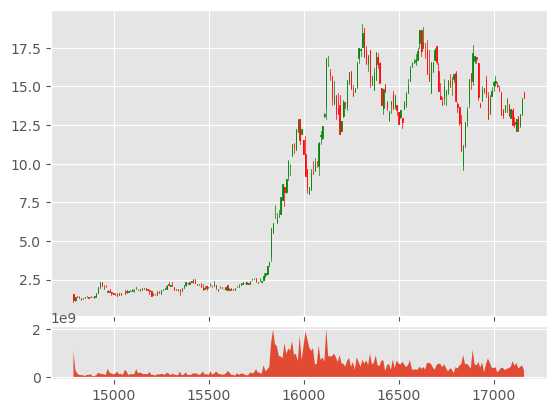

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import yfinance as yf
import datetime as dt

# Define the start and end dates
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2016, 12, 31)

# Download the data
df = yf.download('TSLA', start=start, end=end)

# Resample the adjusted close prices and compute OHLC values
df_ohlc = df['Adj Close'].resample('10D').ohlc()

# Resample and sum the volume
df_volume = df['Volume'].resample('10D').sum()

# Reset index for df_ohlc to turn the dates into a column
df_ohlc.reset_index(inplace=True)

# Convert dates to the format required by candlestick_ohlc
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

# Define the subplots
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan=1, colspan=1, sharex=ax1)

# Plot the OHLC data
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g', colordown='r')

# Plot the volume
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)

# Display the plot
plt.show()
